## **What is a regression problem? - Predicting a number**

* How much will this house sell for?
* How many people will buy this app?
* How much will my health insurance be?
* How much should I save each week for fuel?

Determing the relationship between dependent (outcome/prediction) and independent (features) variables

# **Introduction to Regression with Neural Networks in TensorFlow**

There are many definitions for a regression proble but in our case we're going to simplify it: predicting a numerical variable based on some other combination of variables - an even simpler definition: predicting a number

In [1]:
# Import TensforFlow
import tensorflow as tf
print(tf.__version__)

2.4.1


## Creating data to view and fit

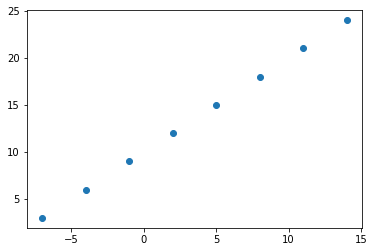

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# **Input and Output Shapes**

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X.shape
output_shape = y.shape

In [6]:
input_shape, output_shape

((8,), (8,))

In [7]:
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape

In [9]:
input_shape, output_shape

(TensorShape([]), TensorShape([]))

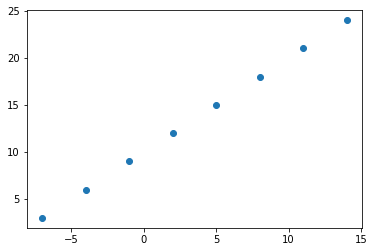

In [10]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model
2. Compiling a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells the model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model)
3. Fitting a model - letting the model try to find patterns between X & y (features and labels).

In [11]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 630ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 10.9748 - mae: 10.9748


In [12]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

## Improving our Model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation function of each layer
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from)

In [14]:
# Let's rebuild the model
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 383ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 11

In [15]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='hard_sigmoid'),
    tf.keras.layers.Dense(100, activation='hard_sigmoid'),
    tf.keras.layers.Dense(100, activation='hard_sigmoid')
  ])

model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(lr=0.0001), metrics=["mae"])

model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 614ms/step - loss: 13.0094 - mae: 13.0094
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 13.0082 - mae: 13.0082
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 13.0070 - mae: 13.0070
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 13.0058 - mae: 13.0058
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 13.0046 - mae: 13.0046
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 13.0034 - mae: 13.0034
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 13.0022 - mae: 13.0022
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 13.0010 - mae: 13.0010
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 12.9998 - mae: 12.9998
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 12.9986 - mae: 12.9986
Epoch 11/100
1/1 [==============================] - 0s 

In [18]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation=None),
  tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(lr=0.01), metrics=["mae"])

model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 397ms/step - loss: 13.3252 - mae: 13.3252
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 12.6189 - mae: 12.6189
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 11.9164 - mae: 11.9164
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 11.2153 - mae: 11.2153
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 10.5129 - mae: 10.5129
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 9.8064 - mae: 9.8064
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 9.0930 - mae: 9.0930
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 8.3699 - mae: 8.3699
Epoch 9/100
1/1 [==============================] - 0s 20ms/step - loss: 7.6340 - mae: 7.6340
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 6.8821 - mae: 6.8821
Epoch 11/100
1/1 [==============================] - 0s 8ms/step 

In [19]:
model.predict([17.0])

array([[27.324867]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model...etc

When it comes to evaluation, it's important to **Visualize**
* The data - what data are we workin with? What does it look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [20]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [21]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

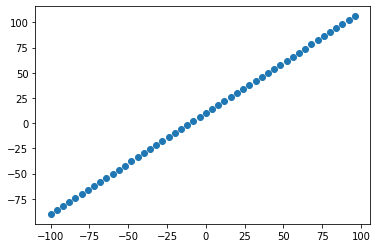

In [22]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

## The 3 sets
* Training set - course materials
* Validation set - practice exam
* Test set - final exam

In [23]:
# Check the length of samples
len(X)

50

In [24]:
# Split the data into training and test sets
X_train = X[:40]
X_test = X[40:]
y_train = y[:40]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

## Visualizing the data

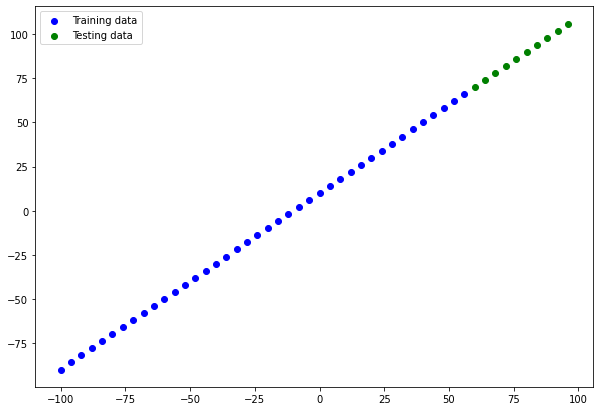

In [25]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c='b', label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend();

In [26]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

# model.fit(X_train, y_train, epochs=100)


In [27]:
# Let's create a model which specifices an input shape in the layer to automatically build model
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
  tf.keras.layers.Dense(1, name="output_layer")
], name="Model_1")

model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

In [28]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [29]:
model.summary()

Model: "Model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params = total number of parameters in the model
* Trainable params = parameters (patterns) the model can update as it trains
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learned patterns or parameters from other models during **transfer learning**)

**Resource**: For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video

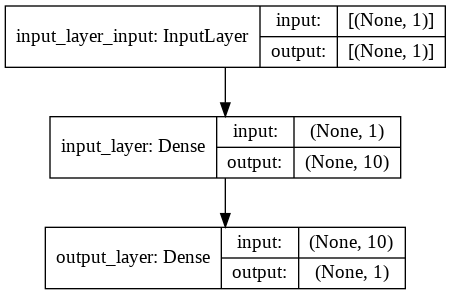

In [30]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions' it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground_truth versus your model's predictions)

In [31]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [32]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [33]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(TensorShape([40]), TensorShape([40]), TensorShape([10]), TensorShape([10]))

In [34]:
# Let's create a plotting function
def plot_preds(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, preds=y_pred):
  """
  Plots training data, test data and compares predictions to the ground truth labels
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red
  plt.scatter(test_data, preds, c="r", label="Predictions")
  # Show the legend
  plt.legend();

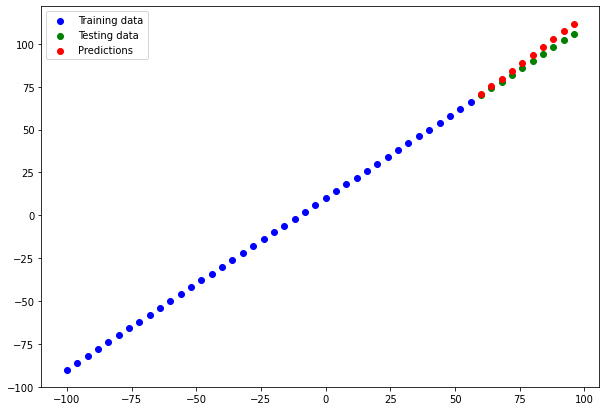

In [35]:
plot_preds()

## Evaluating a model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [36]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 165ms/step - loss: 3.1969 - mae: 3.1969


[3.1969451904296875, 3.1969451904296875]

In [37]:
# Calculating MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

In [38]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)>

In [39]:
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.constant(tf.squeeze(y_pred))).numpy()
mae

3.1969407

In [40]:
# Mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))

mse.numpy()

13.070143

In [41]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred)).numpy()

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred)).numpy()

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> and so on
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels)
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden untis in each layer
3. Train for longer - give your model more of a chance to find patterns in the data

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build** `model_1`

In [42]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"])

model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 16.4124 - mae: 16.4124
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 11.0829 - mae: 11.0829
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 11.1242 - mae: 11.1242
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 8.6945 - mae: 8.6945
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 9.8003 - mae: 9.8003
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 9.5263 - mae: 9.5263
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.4102 - mae: 8.4102
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 9.1449 - mae: 9.1449
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 19.4932 - mae: 19.4932
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 9.6061 - mae: 9.6061
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - los

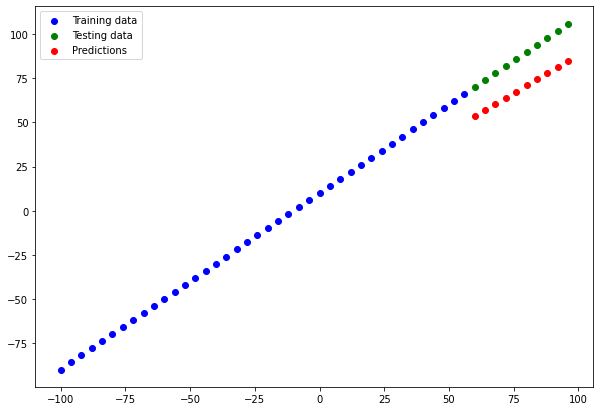

In [43]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_preds(preds=y_preds_1)

In [44]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [45]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mse"])

model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 10ms/step - loss: 26.8627 - mse: 1015.8977
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 24.4175 - mse: 767.5334
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 31.5187 - mse: 1433.3082
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 27.8490 - mse: 1141.6672
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 14.6465 - mse: 267.4541
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 11.9682 - mse: 169.5529
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 11.0874 - mse: 141.6589
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.3978 - mse: 167.3422
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 42.4087 - mse: 2772.5432
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 28.3537 - mse: 1129.8183
Epoch 11/100
2/2 [=========================

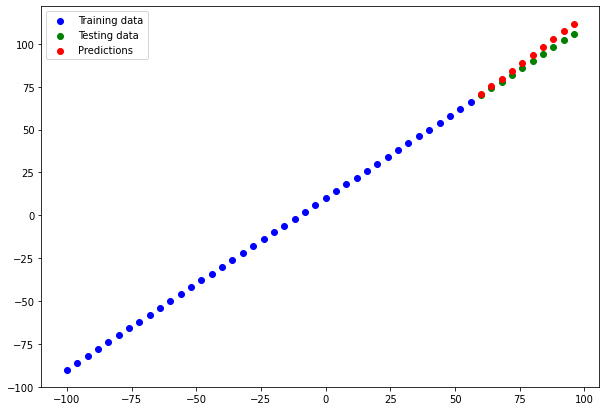

In [46]:
y_preds_2 = model_2.predict(X_test)
plot_preds(preds=y_preds_2)

In [47]:
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)

Epoch 1/500
2/2 [==============================] - 0s 8ms/step - loss: 26.8627 - mae: 26.8627
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 24.4175 - mae: 24.4175
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 31.5187 - mae: 31.5187
Epoch 4/500
2/2 [==============================] - 0s 9ms/step - loss: 27.8490 - mae: 27.8490
Epoch 5/500
2/2 [==============================] - 0s 5ms/step - loss: 14.6465 - mae: 14.6465
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 11.9682 - mae: 11.9682
Epoch 7/500
2/2 [==============================] - 0s 3ms/step - loss: 11.0874 - mae: 11.0874
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 11.3978 - mae: 11.3978
Epoch 9/500
2/2 [==============================] - 0s 18ms/step - loss: 42.4087 - mae: 42.4087
Epoch 10/500
2/2 [==============================] - 0s 9ms/step - loss: 28.3537 - mae: 28.3537
Epoch 11/500
2/2 [==============================] - 0s 8ms

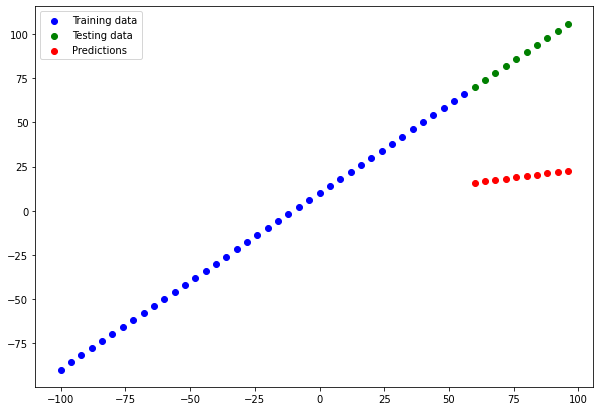

In [48]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

model_3.fit(X_train, y_train, epochs=500)

y_preds_3 = model_3.predict(X_test)

plot_preds(preds=y_preds_3)

mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)

## Comparing the results of the experiments

In [49]:
import pandas as pd

model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]

all_results = pd.DataFrame(model_results, columns=['model', 'mae', 'mse'])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.713615,4808.027344


In [50]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


**Note**: One of your main goals should be to minimize the time between your experiements. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember - Experiment, experiment, experiment

## Tracking experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiements. Luckily, there are tools to help us!

**Resource**: As you build more models, you'll want to look into using:
* TensorBoard - a component of the TensorFlow library to help track modelling experiements
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into Tensorboard)


## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app

### There are two main formats we can save our model's to - SavedModel format, and HDF5 format

In [51]:
model_2.save("drive/MyDrive/Colab Notebooks/TensorFlow Cert Course/TrainedModels/Best_Model_SavedModel.h5")

In [52]:
loaded_model = tf.keras.models.load_model('drive/MyDrive/Colab Notebooks/TensorFlow Cert Course/TrainedModels/Best_Model_SavedModel.h5')

In [53]:
loaded_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [54]:
loaded_y_preds = loaded_model.predict(X_test)

In [55]:
loaded_mae = mae(y_true=y_test, y_pred=loaded_y_preds)
loaded_mae

3.1969407

In [56]:
model_2_preds = model_2.predict(X_test)

model_2_preds == loaded_y_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [57]:
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_y_preds)

True

In [58]:
# Import libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
# Read in data set
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [60]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [61]:
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [62]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(1070, 268, 1070, 268)

In [64]:
X_train.head(15)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
170,63,41.470,0,0,1,1,0,0,0,1,0
277,22,24.300,0,1,0,1,0,0,0,0,1
1033,18,21.565,0,0,1,0,1,1,0,0,0
209,40,41.230,1,0,1,1,0,1,0,0,0
947,37,34.200,1,0,1,0,1,1,0,0,0


In [65]:
tf.random.set_seed(42)

# Create a model

insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 10200.7270 - mae: 10200.7270
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7718.1919 - mae: 7718.1919
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 6983.7824 - mae: 6983.7824
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 8083.4829 - mae: 8083.4829
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7793.8446 - mae: 7793.8446
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7618.4107 - mae: 7618.4107
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7678.4977 - mae: 7678.4977
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7780.4291 - mae: 7780.4291
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7588.8130 - mae: 7588.8130
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7520.6838 - mae: 7520.68

In [66]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [67]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

## This needs improvement obviously - let's see how we can improve it

In [68]:
# Set random seed
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=["mae"])

insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13251.7400 - mae: 13251.7400
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 12768.7726 - mae: 12768.7726
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12248.2855 - mae: 12248.2855
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12353.0242 - mae: 12353.0242
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 11243.3972 - mae: 11243.3972
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9718.5255 - mae: 9718.5255
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8354.8474 - mae: 8354.8474
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7732.2964 - mae: 7732.2964
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7537.6737 - mae: 7537.6737
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7652.7184 - mae:

In [69]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

In [70]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=["mae"])

history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 13251.7400 - mae: 13251.7400
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 12768.7726 - mae: 12768.7726
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12248.2855 - mae: 12248.2855
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12353.0242 - mae: 12353.0242
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 11243.3972 - mae: 11243.3972
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9718.5255 - mae: 9718.5255
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8354.8474 - mae: 8354.8474
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7732.2964 - mae: 7732.2964
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7537.6737 - mae: 7537.6737
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7652.7184 - mae:

In [71]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3491.2961 - mae: 3491.2961


[3491.296142578125, 3491.296142578125]

Text(0.5, 0, 'epochs')

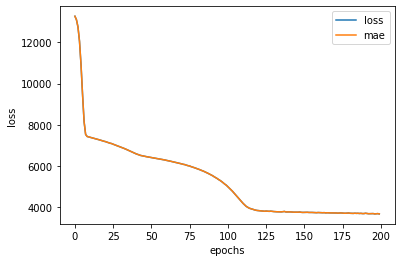

In [72]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

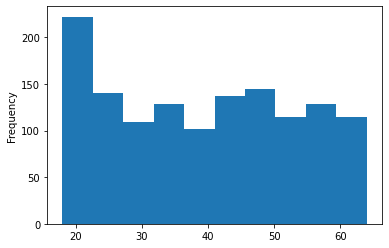

In [73]:
X["age"].plot(kind="hist")

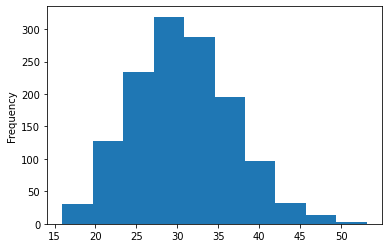

In [74]:
X["bmi"].plot(kind="hist")

In [75]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

# Feature scaling
**Scale** (also referred to as normilization): Converts all values to between 0 and 1 whilst preserving the orginal distribution - it's the default scaler with neural networks and the sklearn function is `MinMaxScaler`

**Standardization**: Removes the mean and divides each value by the standard deviation. Transforms a feature to have close to normal distribution (caution: this reduces the effect of outliers) - The sklearn function is `StandardScaler`

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


To prepare our data, we can borrow a few classes from Scikit-Learn

In [77]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
                              (MinMaxScaler(), ["age", "bmi", "children"]),
                              (OneHotEncoder(), ["sex", "smoker", "region"])  
                             )
# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to the training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [78]:
# What does the data look like now?
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [79]:
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=["mae"])

insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13296.4671 - mae: 13296.4671
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 12948.4245 - mae: 12948.4245
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12705.2201 - mae: 12705.2201
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 13369.7395 - mae: 13369.7395
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 13230.8567 - mae: 13230.8567
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 12995.1999 - mae: 12995.1999
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12876.1059 - mae: 12876.1059
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 13004.0395 - mae: 13004.0395
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12508.0465 - mae: 12508.0465
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 12304.99

In [80]:
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]